# Project | Billonaries vs GDP

### Fuente de datos:

Banco mundial:
    
    https://databank.worldbank.org/reports.aspx?source=2&series=NY.GDP.MKTP.CD&country=#

Forbes realtime:
    
    https://www.forbes.com/billionaires/list/50/#version:realtime
    https://www.forbes.com/decade-of-billionaires/

In [70]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [88]:
PIB_perCapita = pd.read_csv('PIB_perCapita.csv')
PIB_perCapita

,Country,World,United States,China,Russia,Germany,India
0,2010,9558.485597,48466.657603,4550.453108,10674.995783,41531.934198,1357.563727
1,2011,10492.803957,49882.558132,5618.132267,14311.084316,46644.776028,1458.104066
2,2012,10608.951876,51602.931046,6316.918318,15420.874541,43858.363055,1443.882435
3,2013,10785.970949,53106.536767,7050.646271,15974.644627,46285.764069,1449.610451
4,2014,10954.736203,55049.988327,7678.599486,14095.648743,47959.993274,1573.885642
5,2015,10251.099049,56863.371496,8066.942635,9313.013625,41086.729674,1605.605445
6,2016,10292.600173,58021.400500,8147.937705,8704.898413,42107.517270,1732.554242
7,2017,10829.974938,60109.655726,8879.438667,10720.332658,44442.771840,1980.667020
8,2018,11372.247819,63064.418410,9976.677137,11287.355278,47787.160507,1996.915087
9,2019,11417.155024,65279.529026,10216.630334,11497.649250,46467.516202,2100.751461


In [2]:
ingresos = pd.read_csv('ingresos.csv')
ingresos

,Year,Ingreso alto,Ingreso mediano alto,Ingreso mediano,Ingreso mediano bajo,Ingreso mediano y bajo,Ingreso bajo
0,2010,45407.319,14799.033,19986.264,5187.232,20365.705,383.244
1,2011,49004.221,17848.493,23754.894,5906.401,24168.276,407.898
2,2012,49059.218,19119.568,25315.252,6195.683,25744.973,420.914
3,2013,49658.068,20544.506,26852.248,6307.742,27318.637,459.946
4,2014,50752.633,21189.325,27750.785,6561.460,28250.608,497.811
5,2015,47965.780,19893.407,26333.244,6439.838,26827.273,497.264
6,2016,48977.796,19793.622,26516.584,6722.962,26991.046,470.823
7,2017,51201.522,21911.993,29153.758,7241.764,29651.327,486.350
8,2018,54405.285,23580.897,30917.603,7336.705,31434.957,502.363
9,2019,54846.285,23979.749,31709.624,7729.875,32252.234,531.835


In [8]:
forbes_global = pd.read_csv('forbes_global.csv')
forbes_global

,Year/Persons,World,United States,China,Russia,Germany,India
0,$B2010,3600,1400.0,133.2,260.2,216.1,222.1
1,persons_2010,1001,404.0,64.0,61.0,52.0,49.0
2,$B2011,4500,1500.0,230.4,432.7,246.4,246.5
3,persons_2011,1209,413.0,115.0,101.0,52.0,55.0
4,$B2012,4600,1600.0,204.4,376.1,254.3,194.6
5,persons_2012,1226,424.0,95.0,96.0,52.0,48.0
6,$B2013,5400,1900.0,263.0,424.6,294.4,194.9
7,persons_2013,1426,444.0,122.0,108.0,57.0,56.0
8,$B2014,6400,2300.0,374.8,422.2,400.9,337.0
9,persons_2014,1645,492.0,152.0,111.0,85.0,100.0


In [30]:
year=list(range(2010,2021))
#persons
World_b=[]
USA_b=[]
China_b=[]
Russia_b=[]
Germany_b=[]
India_b=[]

#billions
World=[]
USA=[]
China=[]
Russia=[]
Germany=[]
India=[]
#billones
for i in range(0,24):
    if i%2==0:
        World_b.append(forbes_global['World'][i])
        USA_b.append(forbes_global['United States'][i])
        China_b.append(forbes_global['China'][i])
        Russia_b.append(forbes_global['Russia'][i])
        Germany_b.append(forbes_global['Germany'][i])
        India_b.append(forbes_global['India'][i])
    else: #cantidad de personas
        World.append(forbes_global['World'][i])
        USA.append(forbes_global['United States'][i])
        China.append(forbes_global['China'][i])
        Russia.append(forbes_global['Russia'][i])
        Germany.append(forbes_global['Germany'][i])
        India.append(forbes_global['India'][i])
        
#crear nuevo dataframe: (datos hasta 2020)
billonarios_dinero=pd.DataFrame(list(zip(year,World_b,USA_b,China_b,Russia_b,Germany_b,India_b)),columns=['Year','World','United States','China','Russia','Germany','India'])
billonarios_cantidad=pd.DataFrame(list(zip(year,World,USA,China,Russia,Germany,India)),columns=['year','World','United States','China','Russia','Germany','India'])


In [53]:
#concatenando df ingresos y billonarios_dinero
DF=pd.concat([ingresos,billonarios_dinero], axis=1)
DF=DF.drop(['Year'], axis=1)

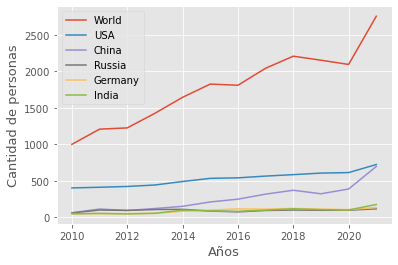

In [89]:
x=list(range(2010,2022))

plt.plot(x,World,label='World')
plt.plot(x,USA,label='USA')
plt.plot(x,China,label='China')
plt.plot(x,Russia,label='Russia')
plt.plot(x,Germany,label='Germany')
plt.plot(x,India,label='India')

plt.title("",fontsize=15)
plt.xlabel("Años",fontsize=13)
plt.ylabel("Cantidad de personas",fontsize=13)
plt.legend()
plt.show()

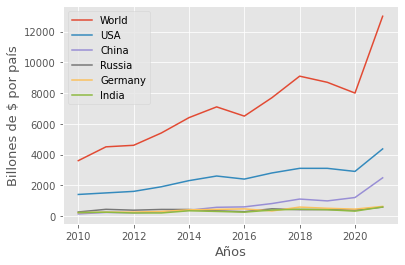

In [90]:
plt.plot(x,World_b,label='World')
plt.plot(x,USA_b,label='USA')
plt.plot(x,China_b,label='China')
plt.plot(x,Russia_b,label='Russia')
plt.plot(x,Germany_b,label='Germany')
plt.plot(x,India_b,label='India')

plt.title("",fontsize=15)
plt.xlabel("Años",fontsize=13)
plt.ylabel("Billones de $ por país",fontsize=13)
plt.legend()
plt.show()

#### Regresión lineal simple

Correlación entre billones de $ de billonarios vs PIB países con ingreso alto

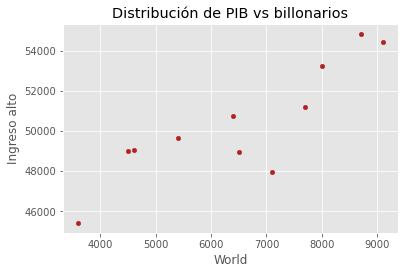

In [33]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

DF.plot(
    x    = 'World',
    y    = 'Ingreso alto',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de PIB vs billonarios');

In [35]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = DF['World'], y =  DF['Ingreso alto'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.85890109682839
P-value:  0.0007081778987712628


El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.85) y significativa (p-value = 0.0007). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el valor del PIB en billones de dólares de los países de ingreso alto en función del acumulado de dinero entre los billonarios a nivel mundial.

In [39]:
# División de los datos en train y test
# ==============================================================================
X = DF[['World']]
y = DF['Ingreso alto']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [40]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [42386.03559132]
Coeficiente: [('World', 1.1612647005988024)]
Coeficiente de determinación R^2: 0.6932503500047386


Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.

In [41]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[52953.54436677]
 [47727.85321407]
 [52489.03848653]]

El error (rmse) de test es: 1773.5739985193395


In [42]:
# División de los datos en train y test
# ==============================================================================

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [43]:
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     8.614
Date:                Thu, 07 Oct 2021   Prob (F-statistic):             0.0261
Time:                        10:57:00   Log-Likelihood:                -69.307
No. Observations:                   8   AIC:                             142.6
Df Residuals:                       6   BIC:                             142.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.239e+04   2499.571     16.957      0.0

In [44]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[3.62698052e+04, 4.85022660e+04],
       [1.93113974e-01, 2.12941543e+00]])

In [45]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,51676.153196,928.753473,49403.575317,53948.731075,47113.502152,56238.804240
1,47611.726744,867.755130,45488.406435,49735.047053,43121.552642,52101.900847
2,46566.588513,1159.634783,43729.064423,49404.112604,41697.839464,51435.337562
3,51327.773786,838.393345,49276.299177,53379.248395,46871.124551,55784.423021


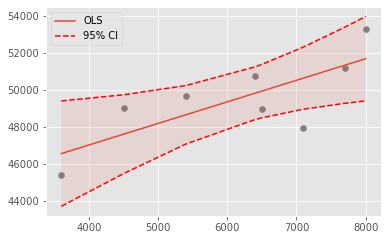

In [46]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [47]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 1773.5739985193745


##### Regresión lineal múltiple

In [51]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)


In [54]:
corr_matrix = DF.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix)

,variable_1,variable_2,r,abs_r
46,Ingreso mediano y bajo,Ingreso mediano,0.999989,0.999989
26,Ingreso mediano,Ingreso mediano y bajo,0.999989,0.999989
13,Ingreso mediano alto,Ingreso mediano,0.998451,0.998451
23,Ingreso mediano,Ingreso mediano alto,0.998451,0.998451
45,Ingreso mediano y bajo,Ingreso mediano alto,0.998429,0.998429
...,...,...,...,...
74,United States,Russia,0.309099,0.309099
95,Russia,China,0.270313,0.270313
85,China,Russia,0.270313,0.270313
97,Russia,Germany,0.084881,0.084881


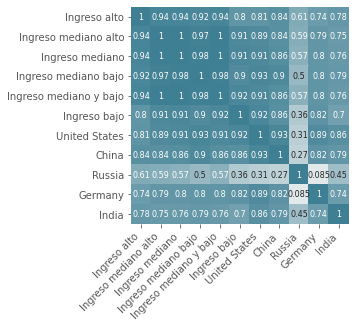

In [57]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

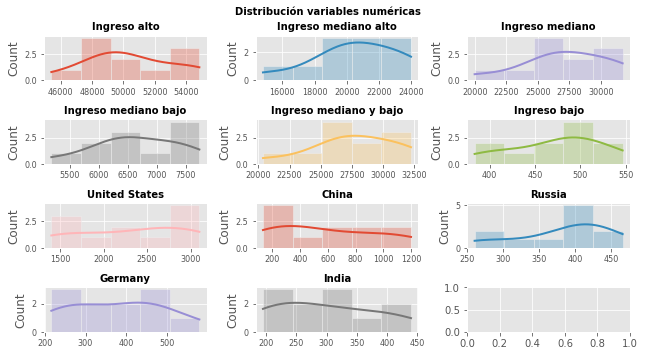

In [85]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = DF.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = DF,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [60]:
# División de los datos en train y test
# ==============================================================================
X = DF[['United States', 'China', 'Russia','Germany','India']]
y = DF['Ingreso alto']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [61]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     7.709
Date:                Thu, 07 Oct 2021   Prob (F-statistic):              0.119
Time:                        11:23:43   Log-Likelihood:                -60.831
No. Observations:                   8   AIC:                             133.7
Df Residuals:                       2   BIC:                             134.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.946e+04   2848.375     13.854

In [63]:
# Creación del modelo utilizando matrices
# ==============================================================================


# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     7.709
Date:                Thu, 07 Oct 2021   Prob (F-statistic):              0.119
Time:                        11:24:10   Log-Likelihood:                -60.831
No. Observations:                   8   AIC:                             133.7
Df Residuals:                       2   BIC:                             134.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.946e+04   2848.375     13.854

In [64]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,27204.713891,51715.854300
United States,-13.878215,8.259050
China,-4.592071,16.167646
Russia,-3.683753,48.945115
Germany,-23.332371,51.452945
India,-44.954662,43.852868


In [65]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

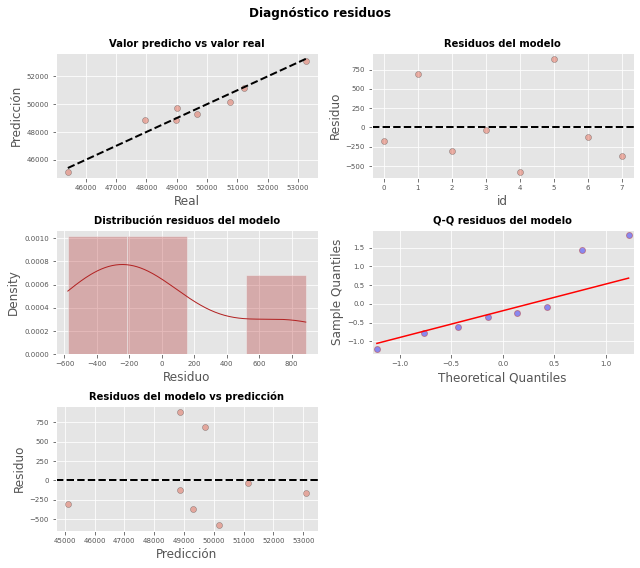

In [66]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [72]:
from scipy import stats
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.8629521131515503, pvalue=0.12846873700618744)

In [73]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
10,53085.653788,910.272325,49169.068086,57002.239490,47359.887286,58811.420290
1,49700.371278,814.928828,46194.015530,53206.727025,44246.997175,55153.745380
0,45102.379257,929.003408,41105.200209,49099.558305,39321.185711,50883.572803
7,51162.651062,895.090051,47311.389412,55013.912711,45481.368217,56843.933907


In [74]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 1314.0956153403129


In [75]:

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [76]:
X_train = sm.add_constant(X_train, prepend=True)
modelo_interacion  = sm.OLS(endog=y_train, exog=X_train,)
modelo_interacion  = modelo_interacion.fit()
print(modelo_interacion.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     7.709
Date:                Thu, 07 Oct 2021   Prob (F-statistic):              0.119
Time:                        11:28:31   Log-Likelihood:                -60.831
No. Observations:                   8   AIC:                             133.7
Df Residuals:                       2   BIC:                             134.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.946e+04   2848.375     13.854